In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
df = pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [4]:
df.columns = df.columns.str.replace('Store ID','Store_ID')

In [5]:
df.describe()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
df.shape

(896, 5)

# Which store has been sold the most

In [7]:
max = df['Store_Sales'].max()
df.query(f'Store_Sales == {max}')

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320


# Which Store has been sold the least

In [8]:
min = df['Store_Sales'].min()
df.query(f'Store_Sales == {min}')

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1250,1508,990,14920


In [11]:
top_5 = df.sort_values(by='Store_Sales').tail(5)
top_5['Store_ID '] = top_5['Store_ID '].astype('str')

In [12]:
fig = px.bar(top_5, x='Store_ID ', y='Store_Sales', title='Top 5 Selling Stores', color='Store_ID ')
fig.show()

By analyzing both stores we can see that the Daily number of costumers might not be related to the number of sales.

In [9]:
#Checking if there are any correlations
Corr_matrix = df.corr()
Corr_matrix

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [10]:
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = Corr_matrix.columns,
        y = Corr_matrix.index,
        z = np.array(Corr_matrix),
        text=Corr_matrix.values,
        texttemplate='%{text:.3f}'
    )
)
fig.show()

When analyzing the correlation graphic we can observe that there is a strong correlation between Store Area and Items available. This means that the greater the Area the greater the number of items available and vice versa.

# Linear Regression Analysis

In [14]:
y = df['Items_Available'] # dependent variable
x1 = df['Store_Area'] # independent variable

In [17]:
x = sm.add_constant(x1) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [18]:
lm.predict(x)

0      1989.827392
1      1752.816867
2      1607.977103
3      1740.846639
4      2122.696928
          ...     
891    1897.656632
892    1664.237177
893    1440.393904
894    1558.899166
895    1409.271310
Length: 896, dtype: float64

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Items_Available   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.023e+05
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:57:04   Log-Likelihood:                -3643.1
No. Observations:                 896   AIC:                             7290.
Df Residuals:                     894   BIC:                             7300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9665      2.843      1.395      0.163      -1.613       9.546
Store_Area     1.1970      0.002    634.275      0.000       1.193       1.201
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.544
Skew:                           0.060   Prob(JB):                        0.762
Kurtosis:                       2.993   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Constant coef: 3.9665	
# Store Area Coef: 1.1970
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 1.1970 * x['Store_Area'] + 3.9665	

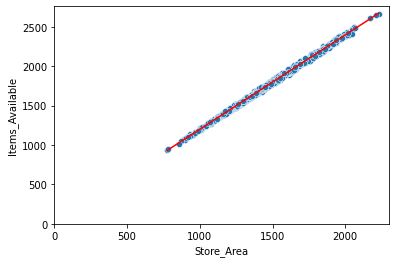

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# plotting the data points
sns.scatterplot(x=x['Store_Area'], y=y)
#plotting the line
sns.lineplot(x=x['Store_Area'],y=y_pred, color='red')
#axes
plt.xlim(0)
plt.ylim(0)
plt.show()

By analyzing this graph we can see that there is a relationship between these two variables, since the R value is equal to 	0.998. We also can understand this relationship as a positive one, this means that when the Store area increases there will be a increase in the items available.

In [22]:
y = df['Store_Sales'] # dependent variable
x1 = df['Daily_Customer_Count'] # independent variable

In [23]:
x = sm.add_constant(x1) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



0      59208.023988
1      59029.166562
2      59314.220585
3      59258.327639
4      59163.309631
           ...     
891    59515.435189
892    59386.881414
893    59504.256600
894    59342.167057
895    59532.203073
Length: 896, dtype: float64

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Store_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06657
Date:                Mon, 01 Aug 2022   Prob (F-statistic):              0.796
Time:                        16:09:15   Log-Likelihood:                -10009.
No. Observations:                 896   AIC:                         2.002e+04
Df Residuals:                     894   BIC:                         2.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.891e+04   1797.800     32.769      0.000    5.54e+04    6.24e+04
Daily_Customer_Count     0.5589      2.166      0.258      0.796      -3.693       4.811
==============================================================================
Omnibus:                       16.194   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.178
Skew:                           0.148   Prob(JB):                      0.00374
Kurtosis:                       2.540   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from decimal import *
'%.0e' % Decimal("%.0g" % 5.891e+04	)

'6e+04'

In [26]:
# Constant coef: 5.891e+04	
# Store Area Coef: 0.5589
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 0.5589 * x['Daily_Customer_Count'] + 5.891e+04

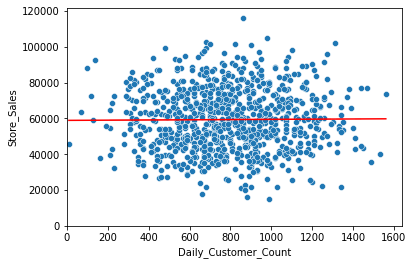

In [27]:
# plotting the data points
sns.scatterplot(x=x['Daily_Customer_Count'], y=y)
#plotting the line
sns.lineplot(x=x['Daily_Customer_Count'],y=y_pred, color='red')
#axes
plt.xlim(0)
plt.ylim(0)
plt.show()

By analyzing this result we can determinate that there is no relationship among these two variables, since the R value is equal to 0. We also can observe that there is not a cause and effect determinig this relationship, meaning that when a value increases os decreases it does not affect the other